In [48]:
import matplotlib.pyplot as plt
import dartwork_mpl as dm
import numpy as np
from matplotlib.transforms import blended_transform_factory

# Use scientific preset for clean look
dm.style.use_preset("scientific")

In [49]:
# Data Definition
labels = [
    "Frontend Development",
    "Backend Architecture",
    "Data Engineering",
    "API Integration",
    "Quality Assurance",
    "DevOps & Infrastructure",
    "Security Compliance",
    "Technical Documentation"
]

# Approximate values for the scenario
# Negative: Review & Refactoring overhead
# Positive: Code Generation savings
neg_values = np.array([-5, -8, -10, -10, -8, -9, -10, -7])
pos_values = np.array([20, 35, 32, 40, 20, 28, 38, 30])

# Calculate Total (Average)
labels.append("Total")
neg_values = np.append(neg_values, np.mean(neg_values))
pos_values = np.append(pos_values, np.mean(pos_values))

# Reverse order for barh (top to bottom)
labels = labels[::-1]
neg_values = neg_values[::-1]
pos_values = pos_values[::-1]

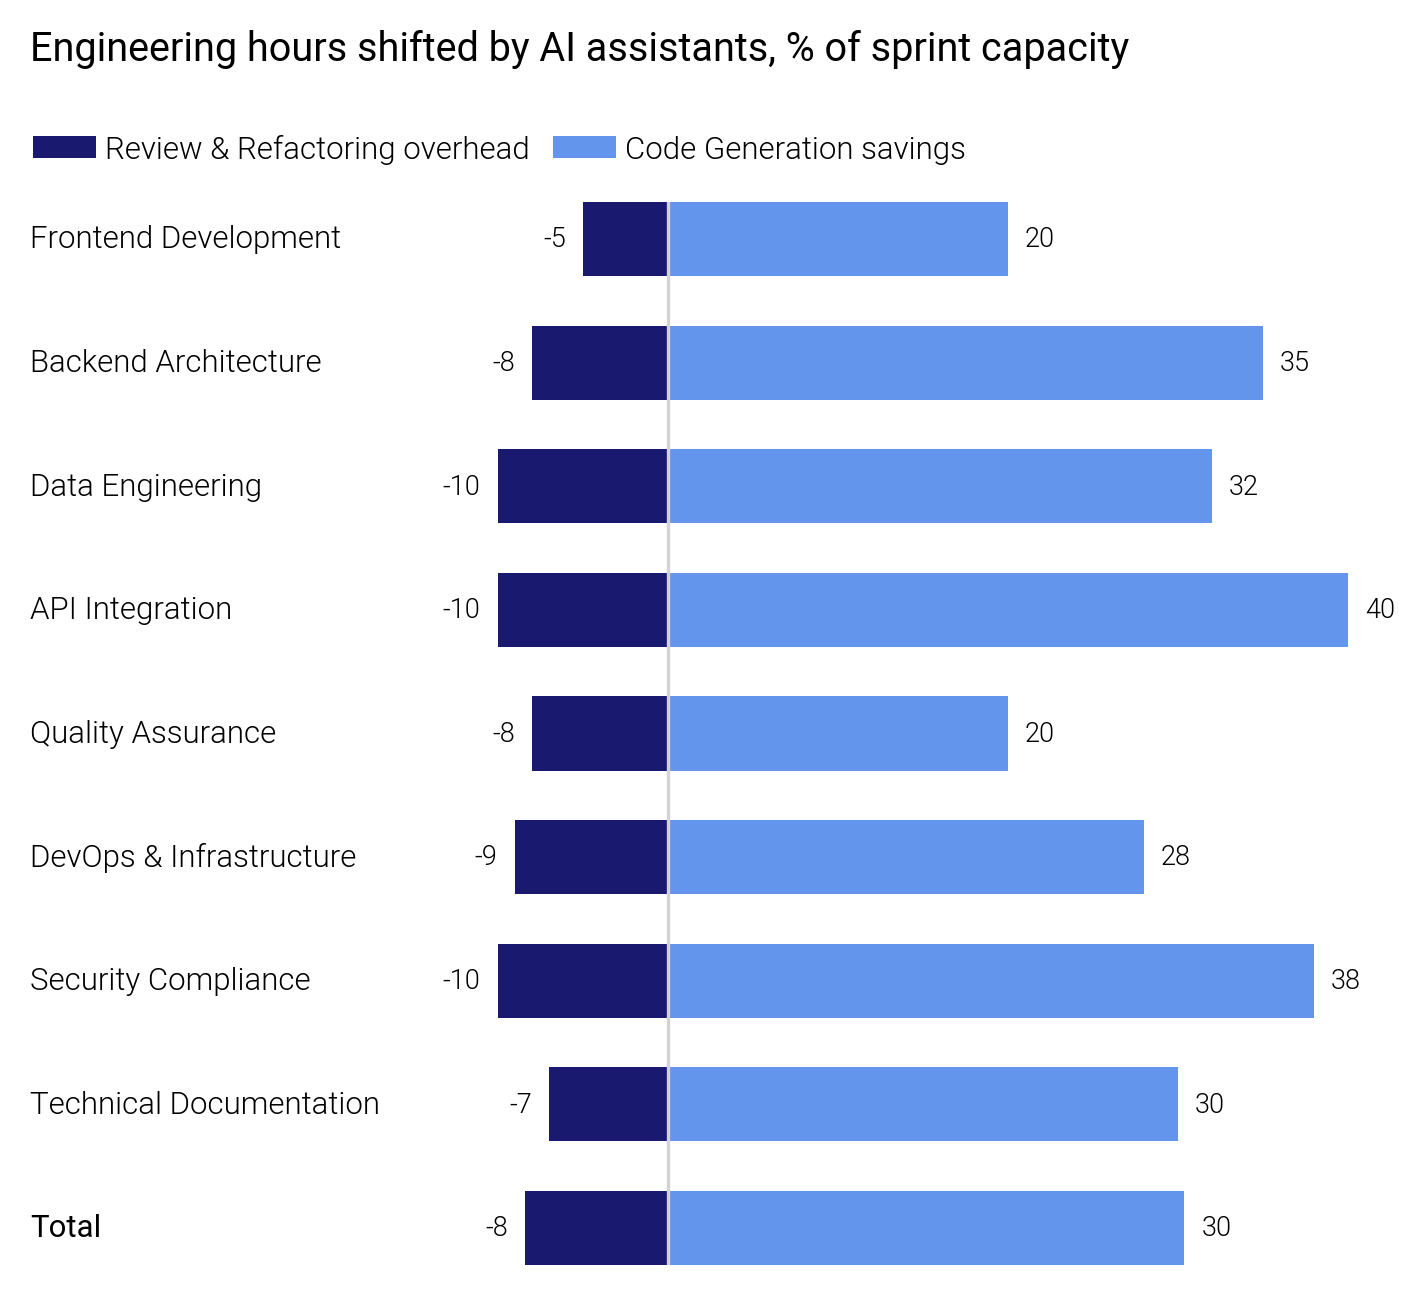

In [58]:
# Plotting Logic
fig = plt.figure(figsize=(dm.cm2in(12), dm.cm2in(12)), dpi=300)

# 1. Dynamic Layout Calculation
# We need to reserve space on the left for the labels.
# The labels will be drawn at figure x=0.02.
# We need to ensure the axes starts after the longest label.
# Let's keep the left margin generous.
left_margin = 0.35  # Reduced from 0.4 to narrow the gap
right_margin = 0.95

# Adjusted top to 0.78 to move graph slightly up but still below header
gs = fig.add_gridspec(1, 1, 
                      left=left_margin, 
                      right=right_margin, 
                      top=0.85, 
                      bottom=0.1)
ax = fig.add_subplot(gs[0, 0])

# 2. Plot Bars
y_pos = np.arange(len(labels))
height = 0.6

# Colors
color_neg = "#191970"  # MidnightBlue-like
color_pos = "#6495ED"  # CornflowerBlue-like

bars_neg = ax.barh(y_pos, neg_values, 
                   height=height, color=color_neg, 
                   label="Review & Refactoring overhead")
bars_pos = ax.barh(y_pos, pos_values, 
                   height=height, color=color_pos, 
                   label="Code Generation savings")

# 3. Styling and Labels
# Remove spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

# Remove x and y ticks
ax.set_xticks([])
ax.set_yticks([])

# Add vertical grid line at 0
ax.axvline(0, color='lightgray', linewidth=0.8)

# Transform for labels: x in figure coords, y in data coords
transform = blended_transform_factory(fig.transFigure, ax.transData)
label_x_pos = 0.02

# Add Text Labels (Left Aligned Indexers)
for i, label in enumerate(labels):
    # Bold 'Total' using dm.fw
    weight = dm.fw(1) if label == 'Total' else dm.fw(0)
    
    # Position: x=0.02 (figure), y=y_pos[i] (data)
    ax.text(label_x_pos, y_pos[i], label, ha='left', va='center', transform=transform, 
            fontsize=dm.fs(0), fontweight=weight, wrap=True)

# Add Value Labels
for rect in bars_neg:
    width = rect.get_width()
    # Label position: left of the bar
    ax.text(width - 1, rect.get_y() + rect.get_height()/2, f"{int(width)}", 
            ha='right', va='center', fontsize=dm.fs(-1))

for rect in bars_pos:
    width = rect.get_width()
    # Label position: right of the bar
    label_text = f"{int(width)}"
    ax.text(width + 1, rect.get_y() + rect.get_height()/2, label_text,
            ha='left', va='center', 
            fontsize=dm.fs(-1))

# Title and Legend
# Title aligned at 0.02 figure coord
fig.text(0.02, 0.95, "Engineering hours shifted by AI assistants, % of sprint capacity", 
         fontsize=dm.fs(2), 
         fontweight=dm.fw(1), 
         ha='left')

# Custom Legend
# Added borderaxespad=0 to ensure exact alignment with x=0.02
fig.legend(loc='upper left', bbox_to_anchor=(0.02, 0.9), 
           ncol=2, 
           frameon=False, 
           fontsize=dm.fs(0), 
           borderaxespad=0)


plt.show()